In [ ]:
import sys
import pandas as pd


def get_song_ids() -> list[int]:
    """
    make sure the annotations folder is in your root directory.
    :return:
    """
    from pathlib import Path

    ROOT = Path(__file__).resolve().parent
    static_1_2000 = (
        ROOT
        / "annotations"
        / "annotations averaged per song"
        / "song_level"
        / "static_annotations_averaged_songs_1_2000.csv"
    )
    static_2000_2058 = (
        ROOT
        / "annotations"
        / "annotations averaged per song"
        / "song_level"
        / "static_annotations_averaged_songs_2000_2058.csv"
    )
    ids_1_2000 = pd.read_csv(static_1_2000)["song_id"].tolist()
    ids_2000_2058 = pd.read_csv(static_2000_2058)["song_id"].tolist()
    return ids_1_2000 + ids_2000_2058


# getting song ids and selected_features (40)
# aiming at producing X: (n_songs, timesteps, n_features) and y: (n_songs, 2) - valence and arousal features44
# sequence_lengths: (n_songs,) - original lengths before padding

song_ids = get_song_ids()
song_ids[:10]

[2, 3, 4, 5, 7, 8, 10, 12, 13, 17]

In [ ]:
import numpy as np

df = pd.read_csv("../selected/_2_selected.csv")
selected_features: list[str] = df.columns.values[1:].tolist()
selected_features

['F0final_sma_stddev',
 'F0final_sma_amean',
 'F0final_sma_de_stddev',
 'F0final_sma_de_amean',
 'pcm_RMSenergy_sma_stddev',
 'pcm_RMSenergy_sma_amean',
 'pcm_RMSenergy_sma_de_stddev',
 'pcm_RMSenergy_sma_de_amean',
 'pcm_fftMag_spectralRollOff75.0_sma_stddev',
 'pcm_fftMag_spectralRollOff75.0_sma_amean',
 'pcm_fftMag_spectralRollOff90.0_sma_stddev',
 'pcm_fftMag_spectralRollOff90.0_sma_amean',
 'pcm_fftMag_spectralRollOff75.0_sma_de_stddev',
 'pcm_fftMag_spectralRollOff75.0_sma_de_amean',
 'pcm_fftMag_spectralRollOff90.0_sma_de_stddev',
 'pcm_fftMag_spectralRollOff90.0_sma_de_amean',
 'pcm_fftMag_spectralFlux_sma_stddev',
 'pcm_fftMag_spectralFlux_sma_amean',
 'pcm_fftMag_spectralFlux_sma_de_stddev',
 'pcm_fftMag_spectralFlux_sma_de_amean',
 'pcm_fftMag_spectralCentroid_sma_stddev',
 'pcm_fftMag_spectralCentroid_sma_amean',
 'pcm_fftMag_spectralCentroid_sma_de_stddev',
 'pcm_fftMag_spectralCentroid_sma_de_amean',
 'pcm_fftMag_spectralHarmonicity_sma_stddev',
 'pcm_fftMag_spectralHarmo

In [7]:
from pathlib import Path

root = Path("").resolve().parent
annots_path_1 = (
    root
    / "annotations"
    / "annotations averaged per song"
    / "song_level"
    / "static_annotations_averaged_songs_1_2000.csv"
)
annots_path_2 = root / "notebooks" / "static_annots_2058.csv"
df_1 = pd.read_csv(annots_path_1)
df_2 = pd.read_csv(annots_path_2)

annotations = pd.concat([df_1, df_2], axis=0)
annotations[annotations["song_id"] == 1998]

,song_id,valence_mean,valence_std,arousal_mean,arousal_std
1741,1998,6.4,1.5,6.2,1.6


Number of songs analyzed: 100
Min length: 156
Max length: 1071
Mean length: 448.6
Median length: 427.5
25th percentile: 336.5
75th percentile: 521.2
95th percentile: 769.2


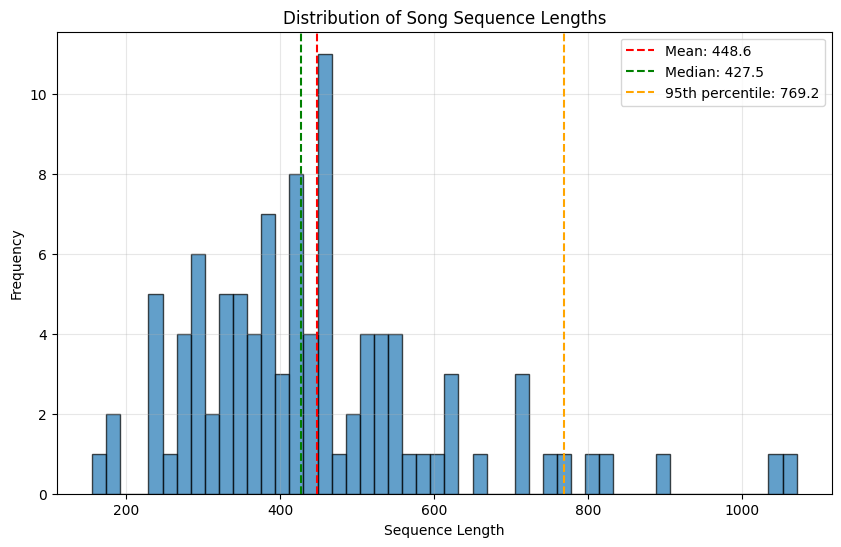

[449,
 441,
 456,
 332,
 240,
 239,
 290,
 248,
 342,
 388,
 460,
 429,
 620,
 831,
 453,
 271,
 238,
 374,
 295,
 546,
 176,
 371,
 588,
 419,
 437,
 427,
 505,
 543,
 1071,
 557,
 465,
 337,
 453,
 415,
 407,
 428,
 464,
 390,
 605,
 156,
 335,
 717,
 304,
 487,
 175,
 451,
 903,
 282,
 532,
 347,
 541,
 631,
 428,
 718,
 427,
 341,
 767,
 480,
 391,
 289,
 305,
 293,
 508,
 538,
 291,
 458,
 383,
 522,
 514,
 1038,
 537,
 723,
 325,
 431,
 422,
 488,
 521,
 354,
 446,
 665,
 382,
 403,
 393,
 295,
 463,
 272,
 363,
 461,
 389,
 246,
 244,
 410,
 572,
 617,
 811,
 368,
 323,
 757,
 352,
 279]

In [8]:
# Let's analyze sequence lengths to determine optimal min/max
import matplotlib.pyplot as plt

# First, let's get all sequence lengths
all_lengths = []
for song_id in song_ids[:100]:  # Sample first 100 songs to avoid memory issues
    try:
        song_data = pd.read_csv(f"../selected/_{song_id}_selected.csv")
        all_lengths.append(len(song_data))
    except FileNotFoundError:
        continue

# Analysis of sequence lengths
print(f"Number of songs analyzed: {len(all_lengths)}")
print(f"Min length: {min(all_lengths)}")
print(f"Max length: {max(all_lengths)}")
print(f"Mean length: {np.mean(all_lengths):.1f}")
print(f"Median length: {np.median(all_lengths):.1f}")
print(f"25th percentile: {np.percentile(all_lengths, 25):.1f}")
print(f"75th percentile: {np.percentile(all_lengths, 75):.1f}")
print(f"95th percentile: {np.percentile(all_lengths, 95):.1f}")

# Plot distribution
plt.figure(figsize=(10, 6))
plt.hist(all_lengths, bins=50, alpha=0.7, edgecolor='black')
plt.axvline(np.mean(all_lengths), color='red', linestyle='--', label=f'Mean: {np.mean(all_lengths):.1f}')
plt.axvline(np.median(all_lengths), color='green', linestyle='--', label=f'Median: {np.median(all_lengths):.1f}')
plt.axvline(np.percentile(all_lengths, 95), color='orange', linestyle='--', label=f'95th percentile: {np.percentile(all_lengths, 95):.1f}')
plt.xlabel('Sequence Length')
plt.ylabel('Frequency')
plt.title('Distribution of Song Sequence Lengths')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

all_lengths

In [9]:
sequences = []
labels = []
sequence_lengths = []
MAX_SEQ_LEN = 600  # Based on analysis - captures ~85-90% of data
MIN_SEQ_LEN = 50   # Include very short sequences - even snippet-like audio

skipped_songs = []
processed_songs = 0

for song_id in song_ids:
    try:
        song_data = pd.read_csv(f"../selected/_{song_id}_selected.csv")
        feat_seq = song_data[selected_features].values  # shape (time_steps, n_selected_features)
        original_length = len(feat_seq)
        
        # Skip only extremely short songs (less than 50 timesteps)
        if original_length < MIN_SEQ_LEN:
            skipped_songs.append((song_id, original_length, "too_short"))
            continue
            
        # Handle variable lengths: pad or truncate to MAX_SEQ_LEN
        if original_length < MAX_SEQ_LEN:
            # Pad with zeros at the end (this now includes short songs)
            padding = np.zeros((MAX_SEQ_LEN - original_length, feat_seq.shape[1]))
            feat_seq = np.vstack([feat_seq, padding])
        else:
            # Truncate to MAX_SEQ_LEN
            feat_seq = feat_seq[:MAX_SEQ_LEN]
        
        sequences.append(feat_seq)
        sequence_lengths.append(original_length)  # Store original length
        
        # Get annotations
        song_annotations = annotations[annotations['song_id'] == song_id]
        if len(song_annotations) == 0:
            skipped_songs.append((song_id, original_length, "no_annotations"))
            sequences.pop()  # Remove the sequence we just added
            sequence_lengths.pop()
            continue
            
        valence = song_annotations['valence_mean'].iloc[0]
        arousal = song_annotations['arousal_mean'].iloc[0]
        labels.append([valence, arousal])
        
        processed_songs += 1
        
    except FileNotFoundError:
        skipped_songs.append((song_id, 0, "file_not_found"))
        continue

# Now create arrays
X = np.array(sequences)  # Shape: (n_songs, MAX_SEQ_LEN, n_features)
y = np.array(labels)     # Shape: (n_songs, 2)
sequence_lengths = np.array(sequence_lengths)  # Shape: (n_songs,)

print(f"Successfully processed: {processed_songs} songs")
print(f"Skipped songs: {len(skipped_songs)}")
print(f"Final shapes:")
print(f"  X (features): {X.shape}")
print(f"  y (labels): {y.shape}")
print(f"  sequence_lengths: {sequence_lengths.shape}")

# Show some statistics
print(f"\nSkipped songs breakdown:")
skip_reasons = {}
for _, _, reason in skipped_songs:
    skip_reasons[reason] = skip_reasons.get(reason, 0) + 1
for reason, count in skip_reasons.items():
    print(f"  {reason}: {count}")

print(f"\nSequence length stats for processed songs:")
print(f"  Min original length: {sequence_lengths.min()}")
print(f"  Max original length: {sequence_lengths.max()}")
print(f"  Mean original length: {sequence_lengths.mean():.1f}")
print(f"  Songs that needed padding: {sum(sequence_lengths < MAX_SEQ_LEN)}")
print(f"  Songs that were truncated: {sum(sequence_lengths > MAX_SEQ_LEN)}")
print(X.shape)
X, y

Successfully processed: 1802 songs
Skipped songs: 0
Final shapes:
  X (features): (1802, 600, 40)
  y (labels): (1802, 2)
  sequence_lengths: (1802,)

Skipped songs breakdown:

Sequence length stats for processed songs:
  Min original length: 88
  Max original length: 1253
  Mean original length: 254.0
  Songs that needed padding: 1627
  Songs that were truncated: 175
(1802, 600, 40)


(array([[[ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,
           2.253395e-01,  1.342798e+00,  2.761010e-01],
         [ 4.661850e+01,  4.197005e+01,  1.818014e-02, ...,
           2.823714e-01,  1.540742e+00,  2.085407e-01],
         [ 2.641163e+01,  8.331398e+01,  2.521972e-02, ...,
          -3.895111e-02,  1.353868e+00, -4.939437e-02],
         ...,
         [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,
           0.000000e+00,  0.000000e+00,  0.000000e+00],
         [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,
           0.000000e+00,  0.000000e+00,  0.000000e+00],
         [ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,
           0.000000e+00,  0.000000e+00,  0.000000e+00]],
 
        [[ 0.000000e+00,  0.000000e+00,  0.000000e+00, ...,
           0.000000e+00,  0.000000e+00,  0.000000e+00],
         [ 2.453278e+01,  1.491984e+01,  3.104210e-04, ...,
           7.940001e-02,  1.242938e+00,  3.255248e-01],
         [ 2.322386e+01,  4.249227e+01,  3.569493e-04, 

In [10]:
from sklearn.preprocessing import StandardScaler
# preprocessing sequences for CRNN training.
# X: raw feature sequences
# y: emotion labels (valence, arousal)
# sequence_lengths: origis sequence length

# taking in song_ids and selcted features
n_songs , max_time_steps, n_features = X.shape

# normalize 
feature_scalers = {}
X_normalized = X.copy()

for feature_index in range(n_features):
    # Collect all real (non-padded) values for this feature across all songs
    real_values = []
    for song_idx in range(n_songs):
        seq_len = sequence_lengths[song_idx]
        # Use .tolist() to append values from ndarray to list
        real_values += X[song_idx, :seq_len, feature_index].tolist()

    # scaler to real values only
    scaler = StandardScaler()
    real_values = np.array(real_values).reshape(-1, 1)
    scaler.fit(real_values)
    
    # scaler to all values
    X_normalized[:, :, feature_index] = scaler.transform(
        X[:, :, feature_index].reshape(-1, 1)
    ).reshape(n_songs, max_time_steps) # reshape to the original features shape
    
    feature_scalers[feature_index] = scaler

# NumPy Indexing and Flattening Explanation

Let's break down the indexing notation `X[:, :, feature_index]` and the flattening operation:

## NumPy Array Indexing with Colons (:)

Your data `X` has shape `(1802, 600, 40)` which means:
- **Dimension 0**: 1802 songs
- **Dimension 1**: 600 timesteps 
- **Dimension 2**: 40 features

The notation `X[:, :, feature_index]` means:
- **First `:`**: Take ALL songs (all 1802 songs)
- **Second `:`**: Take ALL timesteps (all 600 timesteps) 
- **`feature_index`**: Take only ONE specific feature (e.g., feature 0, 1, 2, etc.)

So `X[:, :, 0]` gives you feature #0 for all songs and all timesteps → shape `(1802, 600)`

In [11]:
# tranforming the labels to scale of -1, 1
def transform_emotion_labels(value):
    return (value - 5) / 4

y_processed = y.copy()
y_processed[:, 0] = transform_emotion_labels(y[:, 0]) # valence
y_processed[:, 1] = transform_emotion_labels(y[:, 1]) # arousal

y_processed

array([[-0.475 , -0.5   ],
       [-0.375 , -0.425 ],
       [ 0.175 ,  0.125 ],
       ...,
       [ 0.    , -0.1   ],
       [-0.4575,  0.4575],
       [-0.3   ,  0.2   ]], shape=(1802, 2))

In [12]:
# attention mask for variable length sequences
attention_masks = np.zeros((n_songs, max_time_steps))

for i, seq_length in enumerate(sequence_lengths):
    attention_masks[i, :seq_length] = 1

# X_normalized, y_processed, feature_scalers, attention_masks.

# above is what we are using in the CRNN
attention_masks

array([[1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]], shape=(1802, 600))

In [9]:
# Let's demonstrate with your actual data
print("Your X shape:", X.shape)
print("X has dimensions: (songs, timesteps, features)")

# Example: Extract feature 0 (first feature) for all songs and timesteps
feature_0_all = X[:, :, 0]  # Shape: (1802, 600)
print(f"\nX[:, :, 0] shape: {feature_0_all.shape}")
print("This gives us feature #0 for ALL songs and ALL timesteps")

song_0_all = X[0, :, :]  # Shape: (600, 40)
print(f"\nX[0, :, :] shape: {song_0_all.shape}")
print("This gives us ALL features for song #0 at ALL timesteps")

# Example: Extract feature 0 for song 0 at all timesteps
song_0_feature_0 = X[0, :, 0]  # Shape: (600,)
print(f"\nX[0, :, 0] shape: {song_0_feature_0.shape}")
print("This gives us feature #0 for song #0 at ALL timesteps")

print("\n" + "="*50)
print("FLATTENING EXPLANATION:")
print("="*50)

# The flattening operation
feature_values = X[:, :, 0].flatten()  # Convert 2D to 1D
print(f"\nOriginal X[:, :, 0] shape: {X[:, :, 0].shape}")
print(f"After .flatten(): {feature_values.shape}")
print(f"Total elements: {1802 * 600} = {feature_values.shape[0]}")

print("\nWhat flattening does:")
print("- Takes the 2D array (1802 songs × 600 timesteps)")
print("- Converts it to 1D array (1,081,200 values)")
print("- Order: [song1_t1, song1_t2, ..., song1_t600, song2_t1, song2_t2, ...]")

Your X shape: (1802, 600, 40)
X has dimensions: (songs, timesteps, features)

X[:, :, 0] shape: (1802, 600)
This gives us feature #0 for ALL songs and ALL timesteps

X[0, :, :] shape: (600, 40)
This gives us ALL features for song #0 at ALL timesteps

X[0, :, 0] shape: (600,)
This gives us feature #0 for song #0 at ALL timesteps

FLATTENING EXPLANATION:

Original X[:, :, 0] shape: (1802, 600)
After .flatten(): (1081200,)
Total elements: 1081200 = 1081200

What flattening does:
- Takes the 2D array (1802 songs × 600 timesteps)
- Converts it to 1D array (1,081,200 values)
- Order: [song1_t1, song1_t2, ..., song1_t600, song2_t1, song2_t2, ...]


In [13]:
from tensorflow.keras.layers import (Conv1D, Input, LSTM, Dense, BatchNormalization, MaxPooling1D, Dropout)
from tensorflow.keras.regularizers import l2
from tensorflow.keras.models import Model

def create_emotion_crnn(sequence_length, n_features):
    """Architecture
    - Conv1D layers: learn feature relationships and reduce dimensionality
    - LSTM layers: Capture temporal emotion evolution
    - Dense Layers: Final emotion prediction

    Args:
        sequence_length (_type_): Time steps like 600
        n_features (_type_): selcted features like 40
    Returns:
        Compiled keras model
    """
    inputs = Input(shape=(sequence_length, n_features), name='audio_features') # (batch_size, 500, 40)

    # BLOCK 1 - local pattern extraction
    conv1 = Conv1D(
        filters=64,
        kernel_size=3, # consec time frames
        activation='relu',
        padding='same',
        name='conv1'
    )(inputs) # (batch_size, 500, 64)

    # stablize training
    conv1_bn = BatchNormalization(name='conv1_bn')(conv1)

    # second layer to learn more complex patterns
    conv2 = Conv1D(
        filters=64,
        kernel_size=3,
        activation='relu',
        padding='same',
        name='conv2'
    )(conv1_bn) # (batch_size, 500, 64)    

    # focus on important patterns to reduce temporal resolution
    pool1 = MaxPooling1D(pool_size=2, name='pool1')(conv2) # (batch_size, 250, 64)
    drop1 = Dropout(0.3, name='drop1')(pool1)

    # BLOCK 2 - higher level feature combinations
    conv3 = Conv1D(
        filters=128, # more filters for complex patterns
        kernel_size=3,
        activation='relu',
        padding='same',
        name='conv3'
    )(drop1)

    conv3_bn = BatchNormalization(name='conv3_bn')(conv3)

    conv4 = Conv1D(
        filters=128,
        kernel_size=3,
        activation='relu',
        padding='same',
        name='conv4'
    )(conv3_bn) # (batch_size, 250, 128)

    pool2 = MaxPooling1D(pool_size=2, name='pool2')(conv4) # (batch_size, 125, 128)

    drop2 = Dropout(0.3, name='drop2')(pool2)

    # RECURRENT BLOCK - temporal dependecies in emtional expression
    lstm1 = LSTM(
        units=128,
        return_sequences=True,
        dropout=0.3,
        recurrent_dropout=0.2,
        name="lstm1",
    )(
        drop2
    )  # (batch_size, 125, 128)

    # Second LSTM: Refine temporal understanding
    lstm2 = LSTM(
        units=64,  # Smaller hidden state
        return_sequences=False,  # Return only final output
        dropout=0.3,
        recurrent_dropout=0.2,
        name="lstm2",
    )(lstm1)
    # Shape: (batch_size, 64)
    
    # FINAL PREDICTION BLOCK - map learned representations to valence/arousal
    dense1 = Dense(
        64,
        activation='relu',
        kernel_regularizer=l2(0.01),
        name='dense1'
    )(lstm2)
    
    drop3 = Dropout(0.4, name='drop3')(dense1)
    
    # smaller layer
    dense2 = Dense(
        32,
        activation='relu',
        kernel_regularizer=l2(0.01),
        name='dense2'
    )(drop3)
    
    # output layer: valence and arousal predction
    outputs = Dense(
        2, # v & a
        activation='linear',
        name='emotion_output'
    )(dense2) # (batch_size, 2)
    
    model = Model(inputs=inputs, outputs=outputs, name='EmotionCRNN')
    
    return model

model = create_emotion_crnn(
    sequence_length=600,
    n_features=40
)

model.summary()

Model: "EmotionCRNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ audio_features (InputLayer)     │ (None, 600, 40)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 600, 64)        │         7,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 600, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 600, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 300, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 300, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 300, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_bn (BatchNormalization)   │ (None, 300, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv1D)                  │ (None, 300, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 150, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 150, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm1 (LSTM)                    │ (None, 150, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm2 (LSTM)                    │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ emotion_output (Dense)          │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,146 (1.08 MB)

 Trainable params: 281,762 (1.07 MB)

 Non-trainable params: 384 (1.50 KB)

In [16]:
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

def compile_emotion_crnn(model, learning_rate=0.001):
    """
    Compile CRNN model with appropriate loss function and metrics

    Key Considerations:
    - Regression problem (not classification)
    - Two outputs: valence and arousal
    - Need custom metrics for emotion evaluation
    """

    # Custom loss function for emotion prediction
    def emotion_loss(y_true, y_pred):
        """
        Combined loss for valence and arousal prediction

        Why not just MSE?
        - Valence and arousal may have different scales/importance
        - Can weight them differently based on prediction difficulty
        """

        valence_true = y_true[:, 0]
        arousal_true = y_true[:, 1]
        valence_pred = y_pred[:, 0]
        arousal_pred = y_pred[:, 1]

        # Separate losses for each dimension
        valence_loss = tf.reduce_mean(tf.square(valence_true - valence_pred))
        arousal_loss = tf.reduce_mean(tf.square(arousal_true - arousal_pred))

        # Weight arousal slightly higher (easier to predict)
        total_loss = 0.4 * valence_loss + 0.6 * arousal_loss

        return total_loss

    # Custom metrics for evaluation
    def valence_mse(y_true, y_pred):
        """Calculate MSE specifically for valence"""
        return tf.reduce_mean(tf.square(y_true[:, 0] - y_pred[:, 0]))

    def arousal_mse(y_true, y_pred):
        """Calculate MSE specifically for arousal"""
        return tf.reduce_mean(tf.square(y_true[:, 1] - y_pred[:, 1]))

    def concordance_correlation_coefficient(y_true, y_pred):
        """
        CCC metric commonly used in emotion recognition
        Measures agreement between predicted and true values
        """
        # Flatten predictions
        y_true_flat = tf.reshape(y_true, [-1])
        y_pred_flat = tf.reshape(y_pred, [-1])

        # Calculate means
        mean_true = tf.reduce_mean(y_true_flat)
        mean_pred = tf.reduce_mean(y_pred_flat)

        # Calculate variances and covariance
        var_true = tf.reduce_mean(tf.square(y_true_flat - mean_true))
        var_pred = tf.reduce_mean(tf.square(y_pred_flat - mean_pred))
        covar = tf.reduce_mean((y_true_flat - mean_true) * (y_pred_flat - mean_pred))

        # CCC formula
        ccc = (2 * covar) / (var_true + var_pred + tf.square(mean_true - mean_pred))

        return ccc
    
    # Compile model
    model.compile(
        optimizer=Adam(learning_rate=learning_rate, clipnorm=1.0),
        loss=emotion_loss,  # or 'mse' for simple approach
        metrics=[
            "mae",  # Mean Absolute Error
            valence_mse,  # Valence-specific MSE
            arousal_mse,  # Arousal-specific MSE
            concordance_correlation_coefficient,
        ],
    )

    return model


# Compile the model
model = compile_emotion_crnn(model, learning_rate=0.001)
model.summary()

Model: "EmotionCRNN"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ audio_features (InputLayer)     │ (None, 600, 40)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv1D)                  │ (None, 600, 64)        │         7,744 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 600, 64)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2 (Conv1D)                  │ (None, 600, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool1 (MaxPooling1D)            │ (None, 300, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop1 (Dropout)                 │ (None, 300, 64)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3 (Conv1D)                  │ (None, 300, 128)       │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv3_bn (BatchNormalization)   │ (None, 300, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv4 (Conv1D)                  │ (None, 300, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pool2 (MaxPooling1D)            │ (None, 150, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop2 (Dropout)                 │ (None, 150, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm1 (LSTM)                    │ (None, 150, 128)       │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm2 (LSTM)                    │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense1 (Dense)                  │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ drop3 (Dropout)                 │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense2 (Dense)                  │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ emotion_output (Dense)          │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 282,146 (1.08 MB)

 Trainable params: 281,762 (1.07 MB)

 Non-trainable params: 384 (1.50 KB)

In [ ]:
# import tensorflow as tf

# # Fix the missing tf import for the custom loss function
# def compile_emotion_crnn_fixed(model, learning_rate=0.001):
#     """
#     Compile CRNN model with appropriate loss function and metrics
#     Fixed version with proper tf import
#     """

#     # Custom loss function for emotion prediction
#     def emotion_loss(y_true, y_pred):
#         """Combined loss for valence and arousal prediction"""
#         valence_true = y_true[:, 0]
#         arousal_true = y_true[:, 1]
#         valence_pred = y_pred[:, 0]
#         arousal_pred = y_pred[:, 1]

#         # Separate losses for each dimension
#         valence_loss = tf.reduce_mean(tf.square(valence_true - valence_pred))
#         arousal_loss = tf.reduce_mean(tf.square(arousal_true - arousal_pred))

#         # Weight arousal slightly higher (easier to predict)
#         total_loss = 0.4 * valence_loss + 0.6 * arousal_loss
#         return total_loss

#     # Custom metrics for evaluation
#     def valence_mse(y_true, y_pred):
#         return tf.reduce_mean(tf.square(y_true[:, 0] - y_pred[:, 0]))

#     def arousal_mse(y_true, y_pred):
#         return tf.reduce_mean(tf.square(y_true[:, 1] - y_pred[:, 1]))

#     # Compile model
#     model.compile(
#         optimizer=Adam(learning_rate=learning_rate, clipnorm=1.0),
#         loss=emotion_loss,
#         metrics=["mae", valence_mse, arousal_mse]
#     )
#     return model

# # Recompile with fixed function
# model = compile_emotion_crnn_fixed(model, learning_rate=0.001)
# print("Model compiled successfully!")

# Training Setup - Data Splitting

Now let's split our data for training and set up callbacks for monitoring the training process.

In [17]:
from sklearn.model_selection import train_test_split

def split_emotion_data(X, y, attention_masks, test_size=0.2, val_size=0.2, random_state=42):
    """
    Split data into train/validation/test sets
    
    Args:
        X: Feature sequences (n_songs, seq_len, n_features)
        y: Emotion labels (n_songs, 2)
        attention_masks: Masks for variable lengths (n_songs, seq_len)
        test_size: Proportion for test set
        val_size: Proportion of remaining data for validation
        random_state: Random seed for reproducibility
    
    Returns:
        Dictionary with train/val/test splits
    """
    
    # First split: separate test set
    X_temp, X_test, y_temp, y_test, masks_temp, masks_test = train_test_split(
        X, y, attention_masks, 
        test_size=test_size, 
        random_state=random_state,
        stratify=None  # Can't stratify continuous targets
    )
    
    # Second split: separate train and validation from remaining data
    X_train, X_val, y_train, y_val, masks_train, masks_val = train_test_split(
        X_temp, y_temp, masks_temp,
        test_size=val_size,
        random_state=random_state
    )
    
    print(f"Data split completed:")
    print(f"  Training set: {X_train.shape[0]} songs ({X_train.shape[0]/X.shape[0]*100:.1f}%)")
    print(f"  Validation set: {X_val.shape[0]} songs ({X_val.shape[0]/X.shape[0]*100:.1f}%)")
    print(f"  Test set: {X_test.shape[0]} songs ({X_test.shape[0]/X.shape[0]*100:.1f}%)")
    
    return {
        'X_train': X_train, 'y_train': y_train, 'masks_train': masks_train,
        'X_val': X_val, 'y_val': y_val, 'masks_val': masks_val,
        'X_test': X_test, 'y_test': y_test, 'masks_test': masks_test
    }

# Split the data
data_splits = split_emotion_data(X_normalized, y_processed, attention_masks)

# Extract for easier access
X_train = data_splits['X_train']
y_train = data_splits['y_train']
X_val = data_splits['X_val'] 
y_val = data_splits['y_val']
X_test = data_splits['X_test']
y_test = data_splits['y_test']

print(f"\nFinal shapes:")
print(f"  X_train: {X_train.shape}")
print(f"  y_train: {y_train.shape}")
print(f"  X_val: {X_val.shape}")
print(f"  y_val: {y_val.shape}")
print(f"  X_test: {X_test.shape}")
print(f"  y_test: {y_test.shape}")

Data split completed:
  Training set: 1152 songs (63.9%)
  Validation set: 289 songs (16.0%)
  Test set: 361 songs (20.0%)

Final shapes:
  X_train: (1152, 600, 40)
  y_train: (1152, 2)
  X_val: (289, 600, 40)
  y_val: (289, 2)
  X_test: (361, 600, 40)
  y_test: (361, 2)


# Training Callbacks Setup

Set up callbacks to monitor training progress, save best models, and prevent overfitting.

In [18]:
from tensorflow.keras.callbacks import (
    ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, 
    CSVLogger, TensorBoard
)
import os
from datetime import datetime

def setup_training_callbacks(model_name="emotion_crnn"):
    """
    Set up callbacks for training monitoring and model saving
    
    Returns:
        List of configured callbacks
    """
    
    # Create directories for saving
    timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
    model_dir = f"../output/models/{model_name}_{timestamp}"
    logs_dir = f"../output/results/{model_name}_{timestamp}"
    
    os.makedirs(model_dir, exist_ok=True)
    os.makedirs(logs_dir, exist_ok=True)
    
    callbacks = [
        # Save best model based on validation loss
        ModelCheckpoint(
            filepath=f"{model_dir}/best_model.h5",
            monitor='val_loss',
            save_best_only=True,
            save_weights_only=False,
            mode='min',
            verbose=1
        ),
        
        # Early stopping to prevent overfitting
        EarlyStopping(
            monitor='val_loss',
            patience=15,  # Stop if no improvement for 15 epochs
            restore_best_weights=True,
            verbose=1
        ),
        
        # Reduce learning rate when training plateaus
        ReduceLROnPlateau(
            monitor='val_loss',
            factor=0.5,  # Reduce LR by half
            patience=8,   # Wait 8 epochs before reducing
            min_lr=1e-7,
            verbose=1
        ),
        
        # Log training metrics to CSV
        CSVLogger(
            filename=f"{logs_dir}/training_log.csv",
            append=True
        ),
        
        # TensorBoard for visualization
        TensorBoard(
            log_dir=f"{logs_dir}/tensorboard",
            histogram_freq=1,
            write_graph=True,
            update_freq='epoch'
        )
    ]
    
    print(f"Callbacks configured:")
    print(f"  Model will be saved to: {model_dir}")
    print(f"  Logs will be saved to: {logs_dir}")
    
    return callbacks, model_dir, logs_dir

# Set up callbacks
callbacks, model_save_path, logs_path = setup_training_callbacks()
print(f"\nCallback setup complete!")

Callbacks configured:
  Model will be saved to: ../output/models/emotion_crnn_20250917_152753
  Logs will be saved to: ../output/results/emotion_crnn_20250917_152753

Callback setup complete!


# Model Training Execution

Now let's train the CRNN model with our prepared data and callbacks.

In [19]:
def train_emotion_crnn(model, X_train, y_train, X_val, y_val, 
                      callbacks, epochs=100, batch_size=32):
    """
    Train the CRNN model for emotion recognition
    
    Args:
        model: Compiled Keras model
        X_train, y_train: Training data
        X_val, y_val: Validation data  
        callbacks: List of training callbacks
        epochs: Maximum training epochs
        batch_size: Training batch size
    
    Returns:
        Training history object
    """
    
    print(f"Starting training:")
    print(f"  Training samples: {X_train.shape[0]}")
    print(f"  Validation samples: {X_val.shape[0]}")
    print(f"  Batch size: {batch_size}")
    print(f"  Max epochs: {epochs}")
    print(f"  Input shape: {X_train.shape[1:]}")
    print(f"  Output shape: {y_train.shape[1:]}")
    
    # Start training
    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=epochs,
        batch_size=batch_size,
        callbacks=callbacks,
        verbose=1,
        shuffle=True
    )
    
    print(f"\nTraining completed!")
    print(f"  Total epochs trained: {len(history.history['loss'])}")
    print(f"  Final training loss: {history.history['loss'][-1]:.4f}")
    print(f"  Final validation loss: {history.history['val_loss'][-1]:.4f}")
    
    return history

# Train the model
print("🚀 Starting CRNN training...")
history = train_emotion_crnn(
    model=model,
    X_train=X_train,
    y_train=y_train, 
    X_val=X_val,
    y_val=y_val,
    callbacks=callbacks,
    epochs=50,  # Start with fewer epochs for testing
    batch_size=16  # Smaller batch size for memory efficiency
)

🚀 Starting CRNN training...
Starting training:
  Training samples: 1152
  Validation samples: 289
  Batch size: 16
  Max epochs: 50
  Input shape: (600, 40)
  Output shape: (2,)


2025-09-17 15:29:12.804774: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 110592000 exceeds 10% of free system memory.


Epoch 1/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - arousal_mse: 0.1213 - concordance_correlation_coefficient: -0.0175 - loss: 0.9994 - mae: 0.2733 - valence_mse: 0.1004
Epoch 1: val_loss improved from None to 0.56354, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5

Epoch 1: val_loss improved from None to 0.56354, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5


72/72 ━━━━━━━━━━━━━━━━━━━━ 189s 2s/step - arousal_mse: 0.1110 - concordance_correlation_coefficient: 0.0062 - loss: 0.8370 - mae: 0.2636 - valence_mse: 0.0912 - val_arousal_mse: 0.1130 - val_concordance_correlation_coefficient: 0.0025 - val_loss: 0.5635 - val_mae: 0.2571 - val_valence_mse: 0.0916 - learning_rate: 0.0010
Epoch 2/50
Epoch 2/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - arousal_mse: 0.1024 - concordance_correlation_coefficient: 0.0084 - loss: 0.4741 - mae: 0.2604 - valence_mse: 0.0916
Epoch 2: val_loss improved from 0.56354 to 0.27995, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5

Epoch 2: val_loss improved from 0.56354 to 0.27995, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5


72/72 ━━━━━━━━━━━━━━━━━━━━ 142s 2s/step - arousal_mse: 0.1047 - concordance_correlation_coefficient: 0.0136 - loss: 0.4004 - mae: 0.2571 - valence_mse: 0.0860 - val_arousal_mse: 0.1145 - val_concordance_correlation_coefficient: 0.0084 - val_loss: 0.2799 - val_mae: 0.2571 - val_valence_mse: 0.0908 - learning_rate: 0.0010
Epoch 3/50
Epoch 3/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - arousal_mse: 0.1017 - concordance_correlation_coefficient: 0.0152 - loss: 0.2382 - mae: 0.2553 - valence_mse: 0.0859
Epoch 3: val_loss improved from 0.27995 to 0.16456, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5

Epoch 3: val_loss improved from 0.27995 to 0.16456, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5


72/72 ━━━━━━━━━━━━━━━━━━━━ 139s 2s/step - arousal_mse: 0.1035 - concordance_correlation_coefficient: 0.0154 - loss: 0.2091 - mae: 0.2566 - valence_mse: 0.0851 - val_arousal_mse: 0.1134 - val_concordance_correlation_coefficient: 0.0075 - val_loss: 0.1646 - val_mae: 0.2567 - val_valence_mse: 0.0905 - learning_rate: 0.0010
Epoch 4/50
Epoch 4/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - arousal_mse: 0.1087 - concordance_correlation_coefficient: 0.0202 - loss: 0.1514 - mae: 0.2617 - valence_mse: 0.0901
Epoch 4: val_loss improved from 0.16456 to 0.12218, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5

Epoch 4: val_loss improved from 0.16456 to 0.12218, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5


72/72 ━━━━━━━━━━━━━━━━━━━━ 110s 2s/step - arousal_mse: 0.1040 - concordance_correlation_coefficient: 0.0162 - loss: 0.1353 - mae: 0.2555 - valence_mse: 0.0843 - val_arousal_mse: 0.1137 - val_concordance_correlation_coefficient: 0.0079 - val_loss: 0.1222 - val_mae: 0.2572 - val_valence_mse: 0.0907 - learning_rate: 0.0010
Epoch 5/50
Epoch 5/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 538ms/step - arousal_mse: 0.1055 - concordance_correlation_coefficient: 0.0058 - loss: 0.1134 - mae: 0.2565 - valence_mse: 0.0832
Epoch 5: val_loss improved from 0.12218 to 0.10804, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5

Epoch 5: val_loss improved from 0.12218 to 0.10804, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5


72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 571ms/step - arousal_mse: 0.1039 - concordance_correlation_coefficient: 0.0112 - loss: 0.1095 - mae: 0.2563 - valence_mse: 0.0852 - val_arousal_mse: 0.1139 - val_concordance_correlation_coefficient: 0.0075 - val_loss: 0.1080 - val_mae: 0.2572 - val_valence_mse: 0.0906 - learning_rate: 0.0010
Epoch 6/50
Epoch 6/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step - arousal_mse: 0.1053 - concordance_correlation_coefficient: 0.0129 - loss: 0.1047 - mae: 0.2604 - valence_mse: 0.0892
Epoch 6: val_loss improved from 0.10804 to 0.10352, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5

Epoch 6: val_loss improved from 0.10804 to 0.10352, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5


72/72 ━━━━━━━━━━━━━━━━━━━━ 37s 515ms/step - arousal_mse: 0.1041 - concordance_correlation_coefficient: 0.0127 - loss: 0.1011 - mae: 0.2568 - valence_mse: 0.0851 - val_arousal_mse: 0.1138 - val_concordance_correlation_coefficient: 0.0085 - val_loss: 0.1035 - val_mae: 0.2570 - val_valence_mse: 0.0904 - learning_rate: 0.0010
Epoch 7/50
Epoch 7/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 481ms/step - arousal_mse: 0.1005 - concordance_correlation_coefficient: 0.0173 - loss: 0.0979 - mae: 0.2576 - valence_mse: 0.0883
Epoch 7: val_loss improved from 0.10352 to 0.10217, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5

Epoch 7: val_loss improved from 0.10352 to 0.10217, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5


72/72 ━━━━━━━━━━━━━━━━━━━━ 37s 512ms/step - arousal_mse: 0.1037 - concordance_correlation_coefficient: 0.0204 - loss: 0.0980 - mae: 0.2560 - valence_mse: 0.0844 - val_arousal_mse: 0.1139 - val_concordance_correlation_coefficient: 0.0128 - val_loss: 0.1022 - val_mae: 0.2567 - val_valence_mse: 0.0898 - learning_rate: 0.0010
Epoch 8/50
Epoch 8/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - arousal_mse: 0.1021 - concordance_correlation_coefficient: 0.0263 - loss: 0.0972 - mae: 0.2569 - valence_mse: 0.0863
Epoch 8: val_loss improved from 0.10217 to 0.10144, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5

Epoch 8: val_loss improved from 0.10217 to 0.10144, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5


72/72 ━━━━━━━━━━━━━━━━━━━━ 38s 520ms/step - arousal_mse: 0.1037 - concordance_correlation_coefficient: 0.0247 - loss: 0.0970 - mae: 0.2550 - valence_mse: 0.0835 - val_arousal_mse: 0.1145 - val_concordance_correlation_coefficient: 0.0147 - val_loss: 0.1014 - val_mae: 0.2570 - val_valence_mse: 0.0900 - learning_rate: 0.0010
Epoch 9/50
Epoch 9/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 532ms/step - arousal_mse: 0.1094 - concordance_correlation_coefficient: 0.0253 - loss: 0.1004 - mae: 0.2588 - valence_mse: 0.0844
Epoch 9: val_loss did not improve from 0.10144

Epoch 9: val_loss did not improve from 0.10144
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 564ms/step - arousal_mse: 0.1035 - concordance_correlation_coefficient: 0.0289 - loss: 0.0966 - mae: 0.2552 - valence_mse: 0.0837 - val_arousal_mse: 0.1139 - val_concordance_correlation_coefficient: 0.0131 - val_loss: 0.1017 - val_mae: 0.2569 - val_valence_mse: 0.0897 - learning_rate: 0.0010
Epoch 10/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 564ms/step - arousal_mse: 0.1035

72/72 ━━━━━━━━━━━━━━━━━━━━ 39s 536ms/step - arousal_mse: 0.1033 - concordance_correlation_coefficient: 0.0309 - loss: 0.0962 - mae: 0.2547 - valence_mse: 0.0833 - val_arousal_mse: 0.1144 - val_concordance_correlation_coefficient: 0.0238 - val_loss: 0.1013 - val_mae: 0.2566 - val_valence_mse: 0.0886 - learning_rate: 0.0010
Epoch 11/50
Epoch 11/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 514ms/step - arousal_mse: 0.0997 - concordance_correlation_coefficient: 0.0928 - loss: 0.0924 - mae: 0.2479 - valence_mse: 0.0783
Epoch 11: val_loss improved from 0.10128 to 0.08671, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5

Epoch 11: val_loss improved from 0.10128 to 0.08671, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5


72/72 ━━━━━━━━━━━━━━━━━━━━ 40s 561ms/step - arousal_mse: 0.0984 - concordance_correlation_coefficient: 0.1338 - loss: 0.0913 - mae: 0.2466 - valence_mse: 0.0775 - val_arousal_mse: 0.0963 - val_concordance_correlation_coefficient: 0.2243 - val_loss: 0.0867 - val_mae: 0.2306 - val_valence_mse: 0.0764 - learning_rate: 0.0010
Epoch 12/50
Epoch 12/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 511ms/step - arousal_mse: 0.0848 - concordance_correlation_coefficient: 0.2611 - loss: 0.0804 - mae: 0.2288 - valence_mse: 0.0690
Epoch 12: val_loss did not improve from 0.08671

Epoch 12: val_loss did not improve from 0.08671
72/72 ━━━━━━━━━━━━━━━━━━━━ 39s 545ms/step - arousal_mse: 0.0819 - concordance_correlation_coefficient: 0.3085 - loss: 0.0786 - mae: 0.2251 - valence_mse: 0.0681 - val_arousal_mse: 0.1635 - val_concordance_correlation_coefficient: 0.1138 - val_loss: 0.1581 - val_mae: 0.3177 - val_valence_mse: 0.1437 - learning_rate: 0.0010
Epoch 13/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 39s 545ms/step - arousal_mse: 0.

72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 584ms/step - arousal_mse: 0.0839 - concordance_correlation_coefficient: 0.2817 - loss: 0.0819 - mae: 0.2302 - valence_mse: 0.0732 - val_arousal_mse: 0.0850 - val_concordance_correlation_coefficient: 0.3832 - val_loss: 0.0814 - val_mae: 0.2174 - val_valence_mse: 0.0740 - learning_rate: 0.0010
Epoch 14/50
Epoch 14/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 548ms/step - arousal_mse: 0.0776 - concordance_correlation_coefficient: 0.3614 - loss: 0.0748 - mae: 0.2156 - valence_mse: 0.0643
Epoch 14: val_loss improved from 0.08136 to 0.07293, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5

Epoch 14: val_loss improved from 0.08136 to 0.07293, saving model to ../output/models/emotion_crnn_20250917_152753/best_model.h5


72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 583ms/step - arousal_mse: 0.0762 - concordance_correlation_coefficient: 0.3712 - loss: 0.0744 - mae: 0.2159 - valence_mse: 0.0659 - val_arousal_mse: 0.0774 - val_concordance_correlation_coefficient: 0.4252 - val_loss: 0.0729 - val_mae: 0.2090 - val_valence_mse: 0.0640 - learning_rate: 0.0010
Epoch 15/50
Epoch 15/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 554ms/step - arousal_mse: 0.0750 - concordance_correlation_coefficient: 0.3993 - loss: 0.0740 - mae: 0.2171 - valence_mse: 0.0658
Epoch 15: val_loss did not improve from 0.07293

Epoch 15: val_loss did not improve from 0.07293
72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 587ms/step - arousal_mse: 0.0755 - concordance_correlation_coefficient: 0.3922 - loss: 0.0741 - mae: 0.2162 - valence_mse: 0.0655 - val_arousal_mse: 0.0827 - val_concordance_correlation_coefficient: 0.3452 - val_loss: 0.0768 - val_mae: 0.2152 - val_valence_mse: 0.0660 - learning_rate: 0.0010
Epoch 16/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 587ms/step - arousal_mse: 0.

72/72 ━━━━━━━━━━━━━━━━━━━━ 43s 595ms/step - arousal_mse: 0.0654 - concordance_correlation_coefficient: 0.5080 - loss: 0.0646 - mae: 0.1989 - valence_mse: 0.0578 - val_arousal_mse: 0.0732 - val_concordance_correlation_coefficient: 0.4417 - val_loss: 0.0698 - val_mae: 0.2064 - val_valence_mse: 0.0602 - learning_rate: 0.0010
Epoch 22/50
Epoch 22/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 624ms/step - arousal_mse: 0.0674 - concordance_correlation_coefficient: 0.4822 - loss: 0.0658 - mae: 0.2037 - valence_mse: 0.0579
Epoch 22: val_loss did not improve from 0.06978

Epoch 22: val_loss did not improve from 0.06978
72/72 ━━━━━━━━━━━━━━━━━━━━ 86s 660ms/step - arousal_mse: 0.0731 - concordance_correlation_coefficient: 0.4374 - loss: 0.0708 - mae: 0.2105 - valence_mse: 0.0616 - val_arousal_mse: 0.1465 - val_concordance_correlation_coefficient: 0.1150 - val_loss: 0.1349 - val_mae: 0.2890 - val_valence_mse: 0.1150 - learning_rate: 0.0010
Epoch 23/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 86s 660ms/step - arousal_mse: 0.

72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 573ms/step - arousal_mse: 0.0653 - concordance_correlation_coefficient: 0.5027 - loss: 0.0641 - mae: 0.1971 - valence_mse: 0.0569 - val_arousal_mse: 0.0721 - val_concordance_correlation_coefficient: 0.4484 - val_loss: 0.0696 - val_mae: 0.2048 - val_valence_mse: 0.0611 - learning_rate: 0.0010
Epoch 28/50
Epoch 28/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 596ms/step - arousal_mse: 0.0718 - concordance_correlation_coefficient: 0.4671 - loss: 0.0677 - mae: 0.2055 - valence_mse: 0.0566
Epoch 28: val_loss did not improve from 0.06957

Epoch 28: val_loss did not improve from 0.06957
72/72 ━━━━━━━━━━━━━━━━━━━━ 46s 632ms/step - arousal_mse: 0.0689 - concordance_correlation_coefficient: 0.4673 - loss: 0.0674 - mae: 0.2046 - valence_mse: 0.0603 - val_arousal_mse: 0.0720 - val_concordance_correlation_coefficient: 0.4188 - val_loss: 0.0697 - val_mae: 0.2053 - val_valence_mse: 0.0613 - learning_rate: 0.0010
Epoch 29/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 46s 632ms/step - arousal_mse: 0.

72/72 ━━━━━━━━━━━━━━━━━━━━ 47s 661ms/step - arousal_mse: 0.0674 - concordance_correlation_coefficient: 0.4827 - loss: 0.0667 - mae: 0.2022 - valence_mse: 0.0603 - val_arousal_mse: 0.0712 - val_concordance_correlation_coefficient: 0.4827 - val_loss: 0.0688 - val_mae: 0.2032 - val_valence_mse: 0.0608 - learning_rate: 0.0010
Epoch 30/50
Epoch 30/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 540ms/step - arousal_mse: 0.0695 - concordance_correlation_coefficient: 0.4976 - loss: 0.0679 - mae: 0.2056 - valence_mse: 0.0597
Epoch 30: val_loss did not improve from 0.06882

Epoch 30: val_loss did not improve from 0.06882
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 571ms/step - arousal_mse: 0.0670 - concordance_correlation_coefficient: 0.4980 - loss: 0.0650 - mae: 0.1998 - valence_mse: 0.0563 - val_arousal_mse: 0.0749 - val_concordance_correlation_coefficient: 0.4154 - val_loss: 0.0730 - val_mae: 0.2100 - val_valence_mse: 0.0630 - learning_rate: 0.0010
Epoch 31/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 41s 571ms/step - arousal_mse: 0.

72/72 ━━━━━━━━━━━━━━━━━━━━ 42s 589ms/step - arousal_mse: 0.0605 - concordance_correlation_coefficient: 0.5509 - loss: 0.0607 - mae: 0.1927 - valence_mse: 0.0557 - val_arousal_mse: 0.0685 - val_concordance_correlation_coefficient: 0.4379 - val_loss: 0.0683 - val_mae: 0.2046 - val_valence_mse: 0.0613 - learning_rate: 5.0000e-04
Epoch 42/50
Epoch 42/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 0s 489ms/step - arousal_mse: 0.0584 - concordance_correlation_coefficient: 0.5603 - loss: 0.0586 - mae: 0.1905 - valence_mse: 0.0539
Epoch 42: val_loss did not improve from 0.06835

Epoch 42: val_loss did not improve from 0.06835
72/72 ━━━━━━━━━━━━━━━━━━━━ 77s 520ms/step - arousal_mse: 0.0605 - concordance_correlation_coefficient: 0.5445 - loss: 0.0604 - mae: 0.1906 - valence_mse: 0.0550 - val_arousal_mse: 0.0725 - val_concordance_correlation_coefficient: 0.4061 - val_loss: 0.0721 - val_mae: 0.2092 - val_valence_mse: 0.0639 - learning_rate: 5.0000e-04
Epoch 43/50
72/72 ━━━━━━━━━━━━━━━━━━━━ 77s 520ms/step - arousal

72/72 ━━━━━━━━━━━━━━━━━━━━ 39s 544ms/step - arousal_mse: 0.0595 - concordance_correlation_coefficient: 0.5571 - loss: 0.0595 - mae: 0.1902 - valence_mse: 0.0538 - val_arousal_mse: 0.0672 - val_concordance_correlation_coefficient: 0.4565 - val_loss: 0.0673 - val_mae: 0.2043 - val_valence_mse: 0.0604 - learning_rate: 5.0000e-04
Epoch 45/50
Epoch 45/50
51/72 ━━━━━━━━━━━━━━━━━━━━ 11s 537ms/step - arousal_mse: 0.0565 - concordance_correlation_coefficient: 0.5513 - loss: 0.0589 - mae: 0.1902 - valence_mse: 0.0569

: 

# Training Results Visualization

Let's visualize the training progress and analyze the learning curves.

In [ ]:
import matplotlib.pyplot as plt

def plot_training_history(history, save_path=None):
    """
    Plot training and validation metrics
    
    Args:
        history: Keras training history object
        save_path: Optional path to save plots
    """
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    
    # Plot training & validation loss
    axes[0, 0].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[0, 0].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[0, 0].set_title('Model Loss Over Time')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot MAE (Mean Absolute Error)
    axes[0, 1].plot(history.history['mae'], label='Training MAE', linewidth=2)
    axes[0, 1].plot(history.history['val_mae'], label='Validation MAE', linewidth=2)
    axes[0, 1].set_title('Mean Absolute Error Over Time')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('MAE')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot Valence MSE
    if 'valence_mse' in history.history:
        axes[1, 0].plot(history.history['valence_mse'], label='Training Valence MSE', linewidth=2)
        axes[1, 0].plot(history.history['val_valence_mse'], label='Validation Valence MSE', linewidth=2)
        axes[1, 0].set_title('Valence MSE Over Time')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Valence MSE')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
    
    # Plot Arousal MSE
    if 'arousal_mse' in history.history:
        axes[1, 1].plot(history.history['arousal_mse'], label='Training Arousal MSE', linewidth=2)
        axes[1, 1].plot(history.history['val_arousal_mse'], label='Validation Arousal MSE', linewidth=2)
        axes[1, 1].set_title('Arousal MSE Over Time')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Arousal MSE')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(f"{save_path}/training_history.png", dpi=300, bbox_inches='tight')
        print(f"Training plots saved to: {save_path}/training_history.png")
    
    plt.show()
    
    # Print final metrics summary
    print("\n📊 Final Training Metrics:")
    print("-" * 40)
    final_epoch = len(history.history['loss']) - 1
    
    for metric in ['loss', 'mae', 'valence_mse', 'arousal_mse']:
        if metric in history.history:
            train_val = history.history[metric][final_epoch]
            val_val = history.history[f'val_{metric}'][final_epoch]
            print(f"{metric.upper():12}: Train={train_val:.4f}, Val={val_val:.4f}")

# Plot the training results
plot_training_history(history, save_path=logs_path)

# Model Evaluation on Test Set

Let's evaluate the trained model on our held-out test set to get unbiased performance metrics.

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

def evaluate_emotion_model(model, X_test, y_test, save_path=None):
    """
    Comprehensive evaluation of the emotion recognition model
    
    Args:
        model: Trained Keras model
        X_test, y_test: Test data
        save_path: Optional path to save results
    
    Returns:
        Dictionary with evaluation metrics
    """
    
    print("🎯 Evaluating model on test set...")
    
    # Generate predictions
    predictions = model.predict(X_test, verbose=1)
    
    # Separate valence and arousal
    y_true_valence = y_test[:, 0]
    y_true_arousal = y_test[:, 1]
    y_pred_valence = predictions[:, 0]
    y_pred_arousal = predictions[:, 1]
    
    # Calculate metrics for each dimension
    metrics = {}
    
    # Valence metrics
    metrics['valence'] = {
        'mse': mean_squared_error(y_true_valence, y_pred_valence),
        'mae': mean_absolute_error(y_true_valence, y_pred_valence),
        'r2': r2_score(y_true_valence, y_pred_valence),
        'rmse': np.sqrt(mean_squared_error(y_true_valence, y_pred_valence))
    }
    
    # Arousal metrics  
    metrics['arousal'] = {
        'mse': mean_squared_error(y_true_arousal, y_pred_arousal),
        'mae': mean_absolute_error(y_true_arousal, y_pred_arousal),
        'r2': r2_score(y_true_arousal, y_pred_arousal),
        'rmse': np.sqrt(mean_squared_error(y_true_arousal, y_pred_arousal))
    }
    
    # Overall metrics
    overall_mse = mean_squared_error(y_test.flatten(), predictions.flatten())
    overall_mae = mean_absolute_error(y_test.flatten(), predictions.flatten())
    
    # Print results
    print("\n📈 Test Set Evaluation Results:")
    print("=" * 50)
    
    print(f"\n🎭 VALENCE Predictions:")
    print(f"  MSE:  {metrics['valence']['mse']:.4f}")
    print(f"  MAE:  {metrics['valence']['mae']:.4f}")
    print(f"  RMSE: {metrics['valence']['rmse']:.4f}")
    print(f"  R²:   {metrics['valence']['r2']:.4f}")
    
    print(f"\n⚡ AROUSAL Predictions:")
    print(f"  MSE:  {metrics['arousal']['mse']:.4f}")
    print(f"  MAE:  {metrics['arousal']['mae']:.4f}")
    print(f"  RMSE: {metrics['arousal']['rmse']:.4f}")
    print(f"  R²:   {metrics['arousal']['r2']:.4f}")
    
    print(f"\n🎯 OVERALL Performance:")
    print(f"  Combined MSE: {overall_mse:.4f}")
    print(f"  Combined MAE: {overall_mae:.4f}")
    
    # Create prediction scatter plots
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Valence scatter plot
    axes[0].scatter(y_true_valence, y_pred_valence, alpha=0.6, s=30)
    axes[0].plot([-1, 1], [-1, 1], 'r--', linewidth=2, label='Perfect Prediction')
    axes[0].set_xlabel('True Valence')
    axes[0].set_ylabel('Predicted Valence')
    axes[0].set_title(f'Valence Predictions (R² = {metrics["valence"]["r2"]:.3f})')
    axes[0].legend()
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xlim([-1.1, 1.1])
    axes[0].set_ylim([-1.1, 1.1])
    
    # Arousal scatter plot
    axes[1].scatter(y_true_arousal, y_pred_arousal, alpha=0.6, s=30)
    axes[1].plot([-1, 1], [-1, 1], 'r--', linewidth=2, label='Perfect Prediction')
    axes[1].set_xlabel('True Arousal')
    axes[1].set_ylabel('Predicted Arousal')
    axes[1].set_title(f'Arousal Predictions (R² = {metrics["arousal"]["r2"]:.3f})')
    axes[1].legend()
    axes[1].grid(True, alpha=0.3)
    axes[1].set_xlim([-1.1, 1.1])
    axes[1].set_ylim([-1.1, 1.1])
    
    plt.tight_layout()
    
    if save_path:
        plt.savefig(f"{save_path}/test_predictions.png", dpi=300, bbox_inches='tight')
        print(f"\nPrediction plots saved to: {save_path}/test_predictions.png")
    
    plt.show()
    
    return metrics, predictions

# Evaluate the model
test_metrics, test_predictions = evaluate_emotion_model(
    model=model, 
    X_test=X_test, 
    y_test=y_test,
    save_path=logs_path
)

# 🤔 Understanding Callbacks & Training Performance Analysis

## How Callbacks Work in Keras

**Callbacks are automatically used internally by Keras during training!** You don't need to call them manually.

When you pass the `callbacks` list to `model.fit()`, Keras automatically:
1. **Calls each callback at specific training events** (start of epoch, end of batch, etc.)
2. **Monitors the specified metrics** (like `val_loss`)
3. **Takes actions based on the callback logic**

Let's break down what each callback is doing behind the scenes: